# Построение рисунков по данным 2013 год для статьи.

In [ ]:
!date
!pwd

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
#from tqdm import tqdm
#import math as mt
import numpy as np

In [2]:
from math import pi

In [3]:
!ls ./data

"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [3]:
datum = pd.read_csv('./data/datum_2013.csv')
len(datum)

2011

In [85]:
datum[datum.run == 4].head().T

,1025,1026,1027,1028,1029
Unnamed: 0,0.0000,1.0000,2.0000,3.0000,4.0000
date,14.0000,14.0000,14.0000,14.0000,14.0000
time,113729.0000,113828.0000,113929.0000,114029.0000,114129.0000
N,5147.8213,5147.8215,5147.8216,5147.8216,5147.8215
E,10423.3205,10423.3208,10423.3209,10423.3208,10423.3206
H,458.9000,459.1000,459.7000,460.8000,462.3000
H-455,11.2000,11.4000,12.0000,13.1000,14.6000
compass,203.3000,223.5000,207.0000,208.1000,206.5000
P_hpa0,968.2000,967.9000,966.2000,964.6000,963.1000
"T0,C",25.4000,24.6000,24.0000,23.6000,23.4000


In [5]:
dat4 = pd.read_csv('./data/flight4_start.csv')
len(dat4)

300

In [7]:
dat4.head()

,Num,t_minutes,h_GPS,h_barometric
0,1,0.000000,458.9,460.814521
1,2,0.983333,459.1,460.378020
2,3,2.000000,459.7,472.593505
3,4,3.000000,460.8,482.925350
4,5,4.000000,462.3,497.248393


### Общие настройки графиков

In [13]:
plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['lines.markersize'] = 3
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 14

In [10]:
#plt.rcParams.keys()

In [60]:
n = 0
print(dat4.h_GPS[n])
print(datum['H-455'][datum.run == 4][n:n+1] - dat4.h_GPS[n])

458.9
1025   -447.7
Name: H-455, dtype: float64


In [71]:
print(datum.minuts[datum.run == 4][158:170])

1183    168
1184    176
1185    177
1186    178
1187    179
1188    181
1189    182
1190    183
1191    184
1192    186
1193    187
1194    188
Name: minuts, dtype: int64


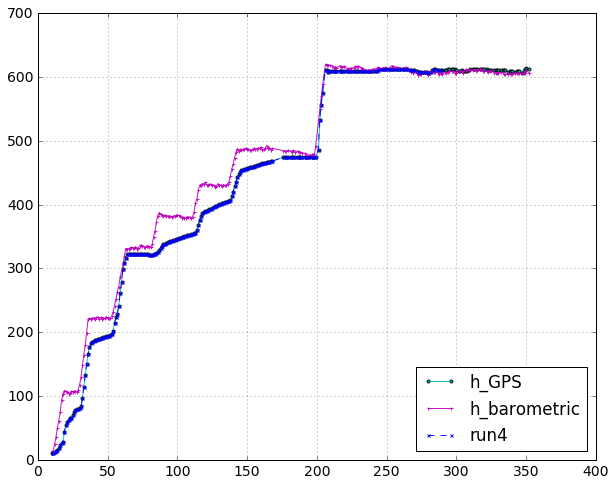

In [93]:
plt.figure(figsize =(10,8))
plcol = ['m+-','bx--', 'gs:', 'rd-.', 'co-']
h0 = 447.7

x = dat4.t_minutes + 10
y = dat4.h_GPS - h0
z = dat4.h_barometric - h0
plt.plot(x, y, plcol[4],  alpha=0.9)
plt.plot(x, z, plcol[0],  alpha=0.9)

x = datum.minuts[  datum.run == 4][:250]
w = datum['H-455'][datum.run == 4][:250]
plt.plot(x, w, plcol[1],  alpha=0.9, label = 'run4')
plt.xlim(0)
plt.legend(loc=4)
plt.grid()

In [14]:
def plot_for_paper(name, file, yaxislabel):
    plcol = ['m+-','bx--', 'gs:', 'rd-.', 'co-']
    for i in range(5):
        x = datum.minuts[datum.run == (i+1)]
        y = datum[name][ datum.run == (i+1)]
        label = 'run ' + str(i+1)
        plt.plot(x, y, plcol[i],  alpha=0.9, label = label)
        
    plt.xlim(0, 600)    
    if name in ['H-455','ClinTh']:
        plt.ylim(0)
    plt.xlabel('Flight time, min')
    plt.ylabel(yaxislabel)
    plt.legend(loc=0)
    plt.grid()
    plt.savefig(file, bbox_inches='tight')    

### Рисование графиков для статьи

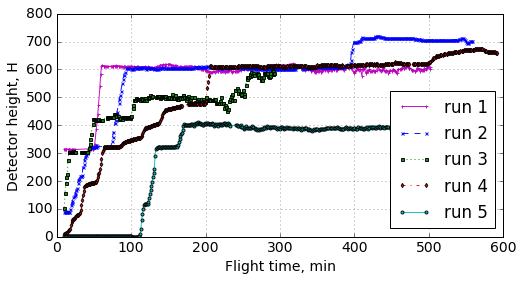

In [15]:
plot_for_paper('H-455', 'height.eps', 'Detector height, H')

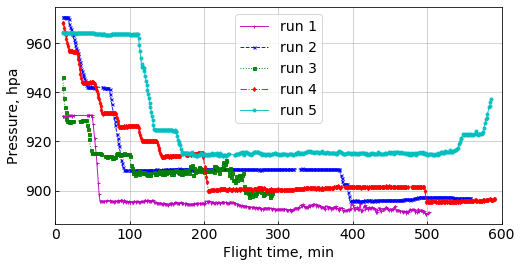

In [91]:
plot_for_paper('P_hpa0','P_hpa0.eps', 'Pressure, hpa')